# CNN FOR FILE ADMINISTRATION CLASSIFICATION

In [1]:
import cv2
import numpy as np
import os, io, sys,glob,shutil
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
#from keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import Sequential

In [6]:
train_data ="D:/DATASET/TRAINING"
val_data  ="D:/DATASET/VALIDATION"
test_data = "TEST"

In [7]:
fl = []
def f_label(img):
    global fl
    label = img.split('.')[0]
    if label == 'ID':
        fl = 0
    elif label == 'ADR':
        fl = 1
    elif label == 'REV':
        fl = 2
    return fl

def train_data_with_label():
    train_images = []
    for i in tqdm(os.listdir(train_data)):
        path = os.path.join(train_data,i)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        try :
            img = cv2.resize(img, (500,500))
            train_images.append([np.array(img),f_label(i)])
        except Exception as e:
            print(str(e))
            os.remove(path)
    shuffle(train_images)
    return train_images

def valid_data_with_label():
    valid_images = []
    for i in tqdm(os.listdir(val_data)):
        path = os.path.join(val_data,i)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        try :
            img = cv2.resize(img, (500,500))
            valid_images.append([np.array(img),f_label(i)])
        except Exception as e:
            print(str(e))
            os.remove(path)
    shuffle(valid_images)
    return valid_images
def test_data_with_label():
    valid_images = []
    for i in tqdm(os.listdir(test_data)):
        path = os.path.join(test_data,i)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        try :
            img = cv2.resize(img, (500,500))
            valid_images.append([np.array(img),f_label(i)])
        except Exception as e:
            print(str(e))
            os.remove(path)
    return valid_images

In [9]:
validation_images = valid_data_with_label()
training_images = train_data_with_label()
test = test_data_with_label()

100%|███████████████████████████████████████████████████████████████████████████████| 383/383 [00:00<00:00, 550.97it/s]


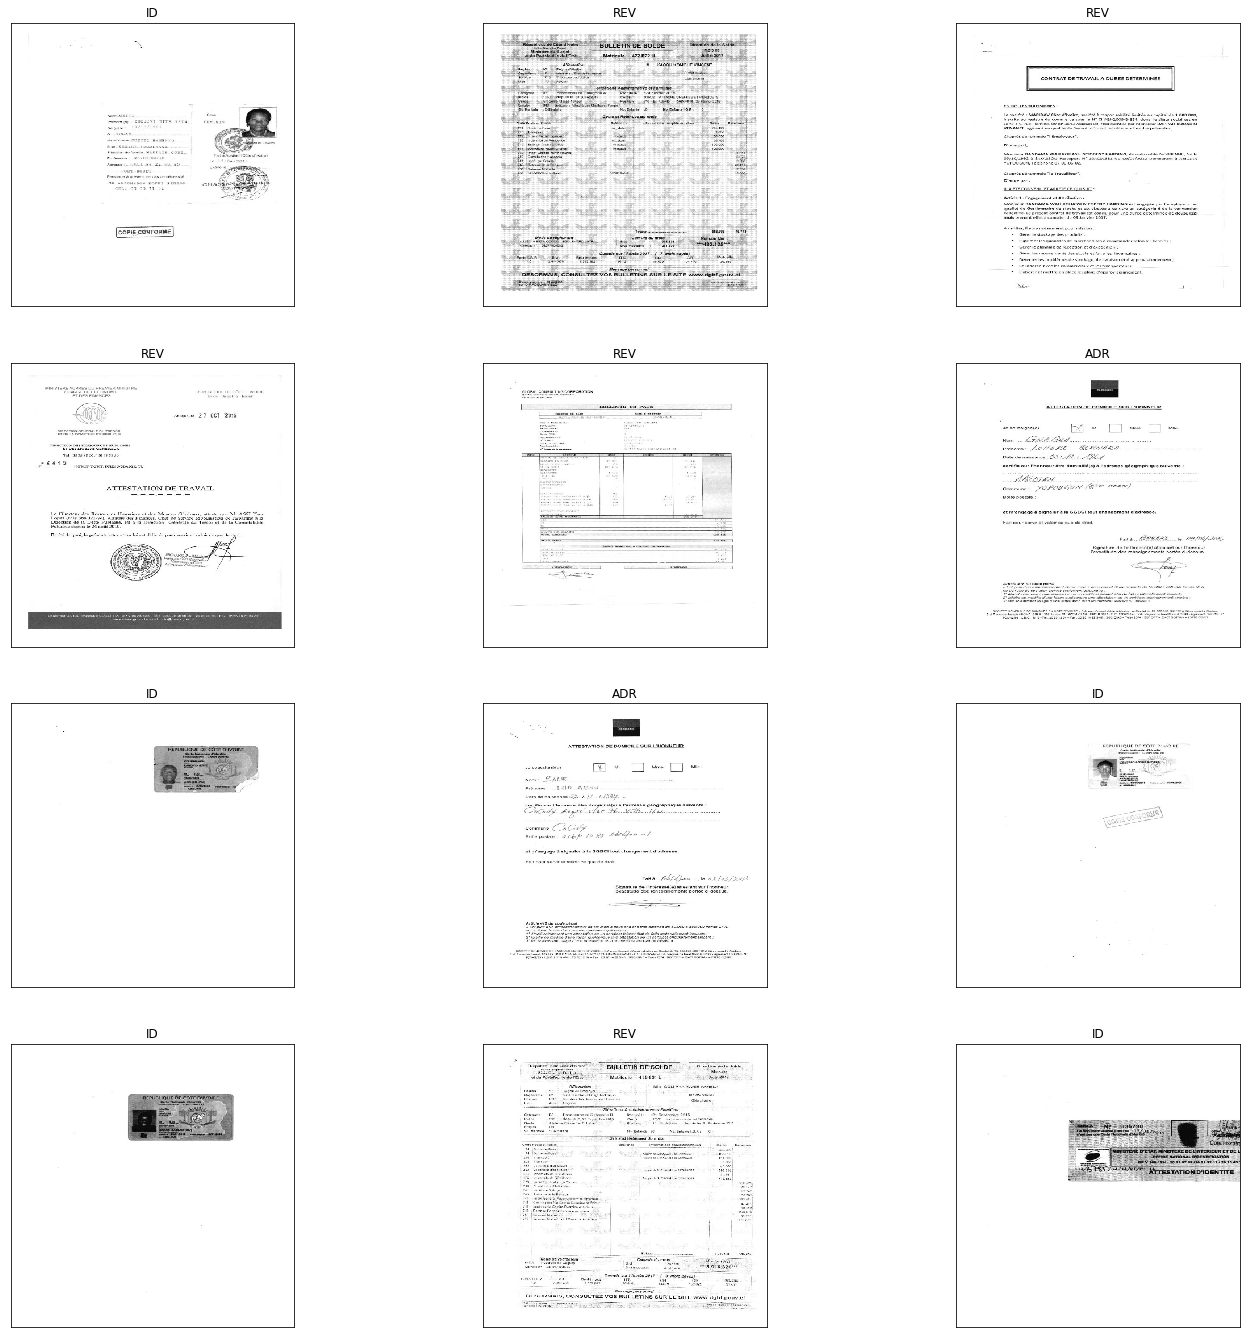

In [7]:
fig = plt.figure(figsize=(24,24))
for cnt,data in enumerate(validation_images[15:27]):
    y = fig.add_subplot(4,3,cnt+1)
    img = data[0]
    label = data[1]
    data = img.reshape(-1,500*500)
    data = data/255.
    data = data.reshape(-1,500,500,1)
    if label == 0:
        str_label = 'ID'
    elif label== 1:
        str_label = 'ADR'
    elif label == 2:
        str_label = 'REV'
    y.imshow(img,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

In [8]:
#scaler = StandardScaler()# pour la standisation des données

#TRAIN
targets=[]
tr_img_scaler=[]
targets = np.array([i[1] for i in training_images])
tr_img_scaler = np.array([i[0] for i in training_images])
tr_img_scaler = tr_img_scaler.astype(np.float32)

#VALIDATE
targets_tst=[]
valid_img_scaler=[]
valid_img_scaler = np.array([i[0] for i in validation_images])
#valid_img_scaler = valid_img_scaler.astype(np.float32)
targets_tst = np.array([i[1] for i in validation_images])

In [9]:
#normalisation et preparation des donnees
#TRAIN
tr_img_scaler = tr_img_scaler.reshape(-1,500*500)
tr_img_scaler = tr_img_scaler/255.
tr_img_scaler = tr_img_scaler.reshape(-1,500,500,1)
#tr_img_scaler = scaler.fit_transform(tr_img_scaler)


#VALIDATE
valid_img_scaler = valid_img_scaler.reshape(-1,500*500)
valid_img_scaler = valid_img_scaler/255.
valid_img_scaler = valid_img_scaler.reshape(-1,500,500,1)
#valid_img_scaler = scaler.fit_transform(valid_img_scaler)

#train_dataset = tf.data.Dataset.from_tensor_slices((tr_img_scaler, targets))
#valid_dataset = tf.data.Dataset.from_tensor_slices((valid_img_scaler, targets_tst))


In [51]:
def C4_BUILDER_1():
    model = Sequential()

    model.add(Conv2D(filters=32,kernel_size=5,strides=1,padding='same',activation='relu',input_shape=(500,500,1)))
    model.add(MaxPool2D(pool_size=2,padding='same'))
     
    model.add(Conv2D(filters=50,kernel_size=5,strides=1,padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=5,padding='same'))
   
    model.add(Conv2D(filters=80,kernel_size=5,strides=1,padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=5,padding='same'))
   
    model.add(Conv2D(filters=120,kernel_size=5,strides=1,padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=5,padding='same'))
    
    model.add(Flatten())
 
    model.add(Dense(510,activation='relu'))
   
    model.add(Dropout(rate=0.5))
    model.add(Dense(3,activation='softmax'))
    
    return model


In [52]:
import tensorflow
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
model = C4_BUILDER_1()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=tr_img_scaler, y=targets, validation_data=(valid_img_scaler, targets_tst), epochs=4, batch_size=64)

Train on 16736 samples, validate on 3565 samples
Epoch 1/4
16736/16736 [==============================] - 2555s 153ms/sample - loss: 0.3138 - accuracy: 0.8814 - val_loss: 0.2272 - val_accuracy: 0.9285
Epoch 2/4
16736/16736 [==============================] - 2500s 149ms/sample - loss: 0.1177 - accuracy: 0.9644 - val_loss: 0.0856 - val_accuracy: 0.9798
Epoch 3/4
16736/16736 [==============================] - 2447s 146ms/sample - loss: 0.0854 - accuracy: 0.9761 - val_loss: 0.1458 - val_accuracy: 0.9621
Epoch 4/4
16736/16736 [==============================] - 2457s 147ms/sample - loss: 0.0728 - accuracy: 0.9792 - val_loss: 0.0752 - val_accuracy: 0.9849


In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 500, 500, 32)      832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 250, 250, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 250, 250, 50)      40050     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 50)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 80)        100080    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 80)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 120)      

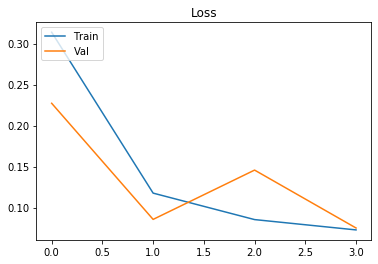

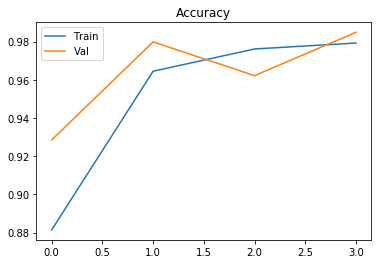

In [55]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

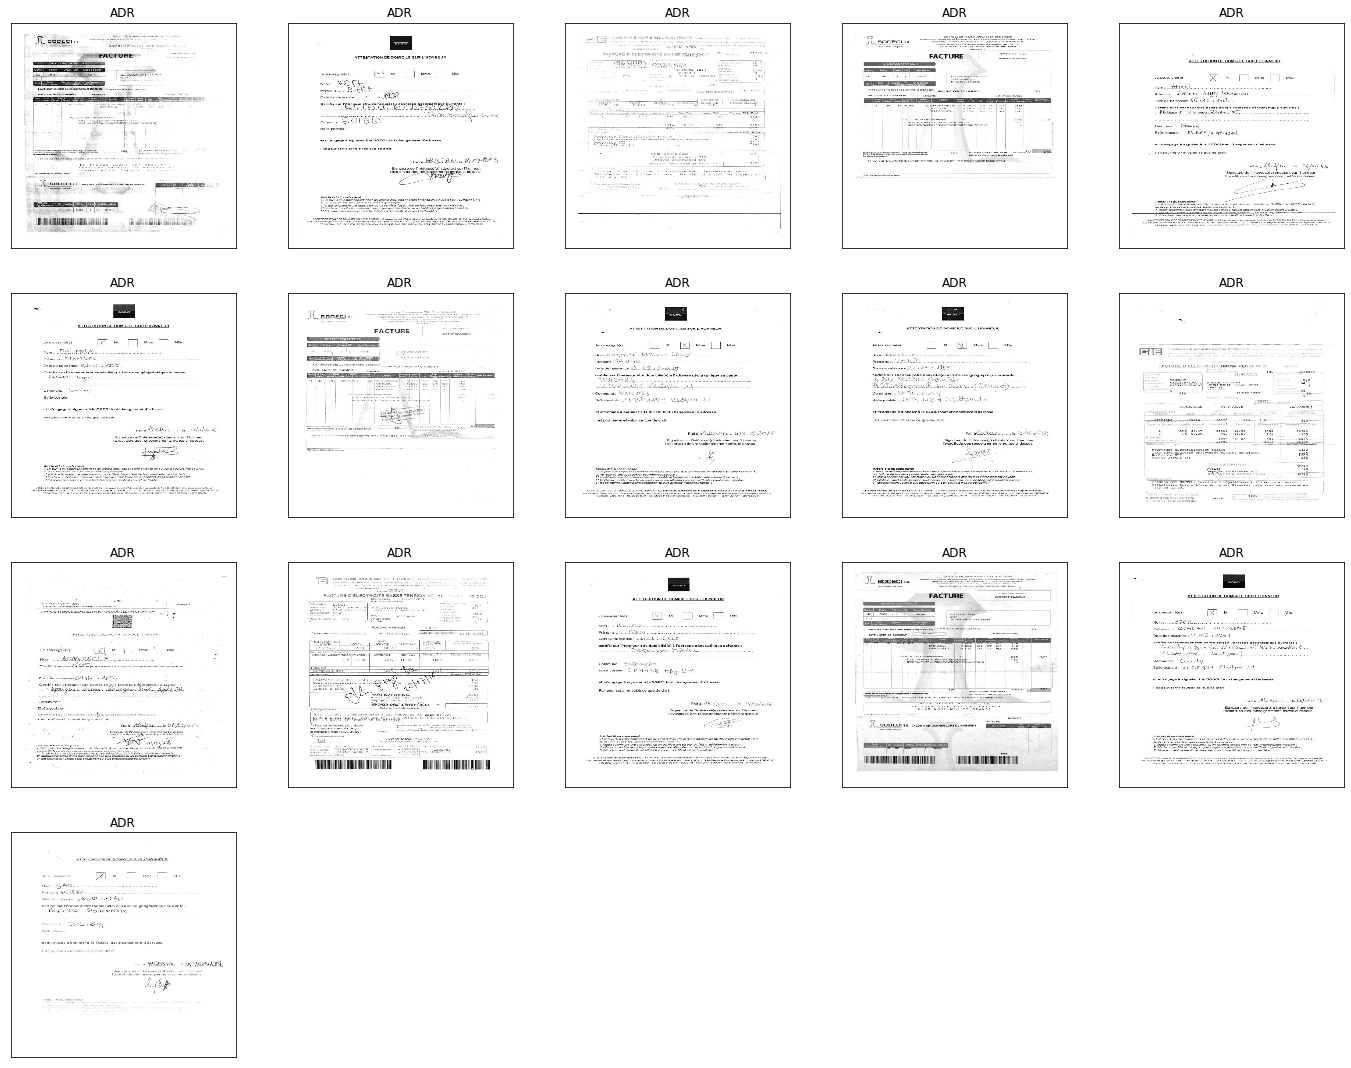

In [58]:
fig = plt.figure(figsize=(24,24))
for cnt,data in enumerate(test[:16]):
    y = fig.add_subplot(5,5,cnt+1)
    img = data[0]
    data = img.reshape(-1,500*500)
    data = data/255.
    data = data.reshape(-1,500,500,1)
   
    model_out = model.predict([data])
    if np.argmax(model_out)==0:
        str_label = 'ID'
    elif np.argmax(model_out)==1:
        str_label = 'ADR'
    elif np.argmax(model_out)==2:
        str_label = 'REV'
    y.imshow(img,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

In [57]:
#la librairie H5PY permettant de manipuler des fichiers HDF5, format de manipulation numérique, avec Python.
model.save('C4_BUILDER_1.h5')

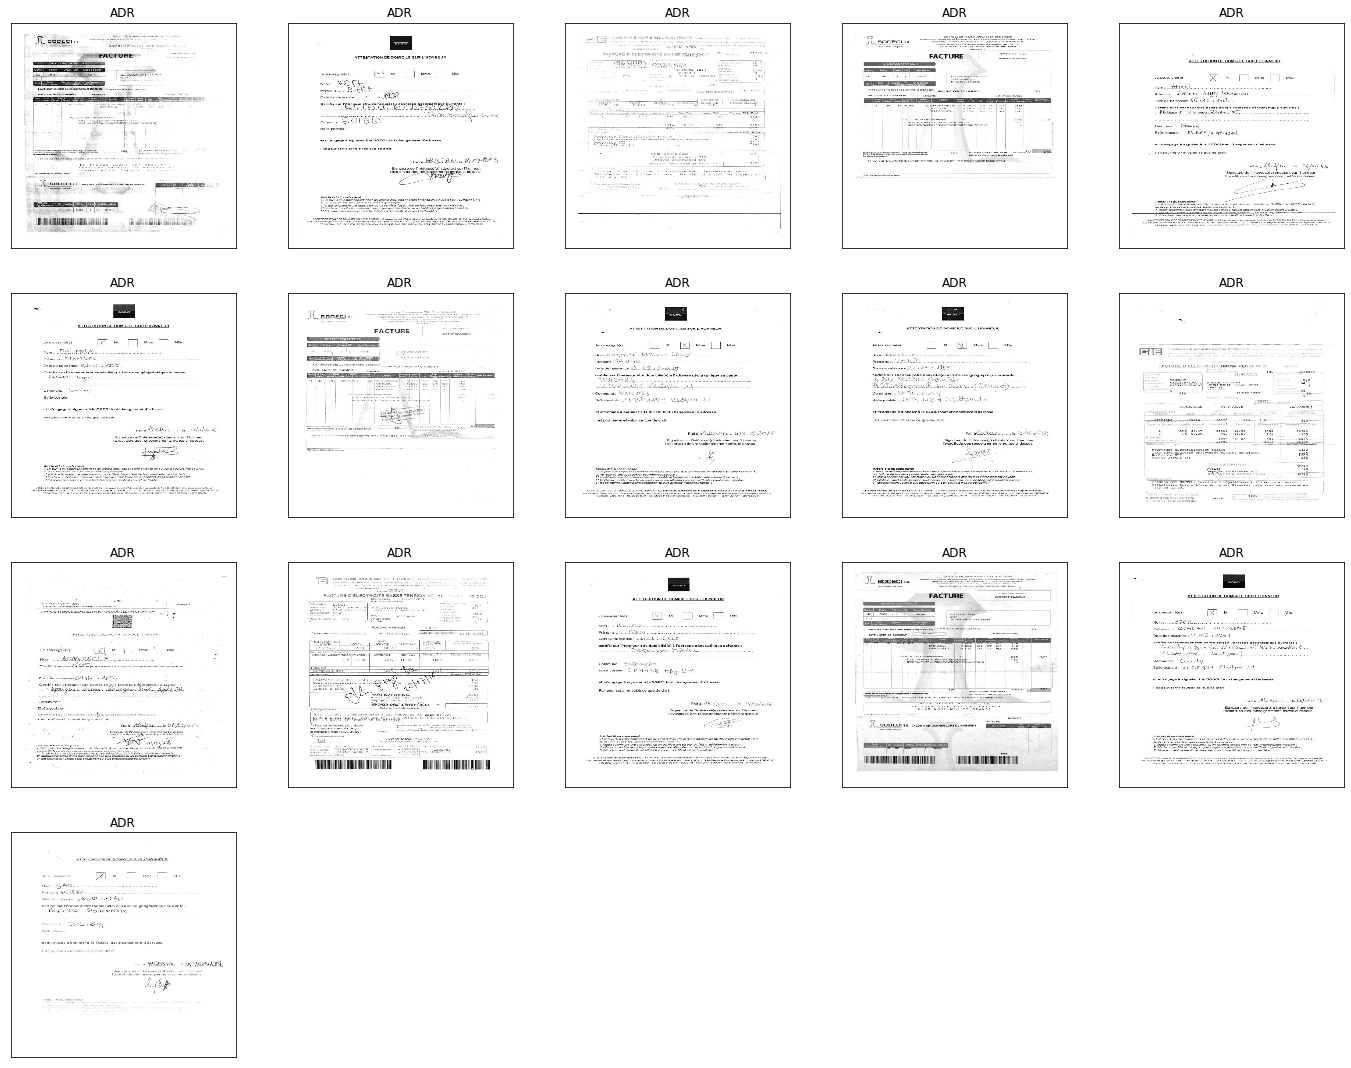

In [13]:
loaded_model = tf.keras.models.load_model("C4_BUILDER_1.h5")
fig = plt.figure(figsize=(24,24))
for cnt,data in enumerate(test[:16]):
    y = fig.add_subplot(5,5,cnt+1)
    img = data[0]
    data = img.reshape(-1,500*500)
    data = data/255.
    data = data.reshape(-1,500,500,1)
   
    model_out = loaded_model.predict([data])
    if np.argmax(model_out)==0:
        str_label = 'ID'
    elif np.argmax(model_out)==1:
        str_label = 'ADR'
    elif np.argmax(model_out)==2:
        str_label = 'REV'
    y.imshow(img,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

In [5]:
#chemin = os.path.dirname(sys.argv[0])
#global courant
#courant = os.path.abspath(chemin)
courant = "C:/Users/ebenyx/1PROJET EBENYX XAVIER/XBUILDER"
loaded_model = tf.keras.models.load_model("X4_BUILDER_1.h5")
def prediction(image):
    out_image=[]
    img = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (500,500))
    data = img.reshape(-1,500*500)
    data = data/255.
    data = data.reshape(-1,500,500,1)
    model_out = loaded_model.predict([data])
    if np.argmax(model_out)==0:
        str_label = 'ID'
    elif np.argmax(model_out)==1:
        str_label = 'ADR'
    elif np.argmax(model_out)==2:
        str_label = 'REV'
    return np.argmax(model_out)

print(prediction("ADR.6_Page_00388.jpg"))

def classification():
    for file in glob.glob(courant+"/TEST/*.*"):
        output = prediction(file)
        if not os.path.exists(courant+"/TEST/"+ str(output)):
            os.mkdir(courant+"/TEST/"+ str(output))
            shutil.move(file,courant+"/TEST/"+ str(output))
        else:
            shutil.move(file,courant+"/TEST/"+ str(output))
    print("ok c'est fait merci")
#classification()  


1
